### Лабораторна робота #2, Людомирський Юрій, КА-96, v23
#### Загальна постановка задачі.
1. Побудувати моделi класифiкацiї або регресiї згiдно з варiантом.
---
2. Виконати прогнози на основi побудованих моделей.
---
3. Для кожної з моделей оцiнити, чи має мiсце перенавчання.
---
4. Розрахувати додатковi результати моделей, наприклад, апостерiорнi iмовiрностi, опорнi вектори або iншi (згiдно з варiантом).
---
5. В задачах класифiкацiї побудувати границi рiшень графiчно для кожної з моделей.
---
6. В задачах класифiкацiї розрахувати значення наступних критерiїв якостi, для кожної моделi окремо на навчальнiй та перевiрочнiй множинах (confusion matrix, precision, recall, f1 score, PR curve, ROC, AUC).
---
7. В задачах регресiї розрахувати критерiї якостi для кожної моделi окремо на навчальнiй та перевiрочнiй множинах (R^2, RMSE, MAE, MAPE).
---
8. Виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделей.
---
9. Зробити висновки про якiсть роботи моделей на дослiджених даних. На основi критерiїв якостi вибрати найкращу модель.
---
10. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi.
---
11. Кожен варiант мiстить два набори даних. Дослiдити обидва набори за наведеними вище етапами.
#### Завдання згідно з варіантом.
1. Побудувати просту логiстичну регресiю, використовуючи sklearn.linear_model.LogisticRegression.
---
2. Побудувати полiномiальну логiстичну регресiю (multinomial logistic regression), встановивши гiперпараметри multi_class = "multinomial" та solver = "lbfgs".
---
3. Для наведених моделей побудувати варiанти з i без регуляризацiї.
---
4. Для кожної моделi розрахувати апостерiорнi iмовiрностi для тестового прикладу, використовуючи метод predict_proba.
#### Початкові дані.
1. sklearn.datasets.load_iris
2. sklearn.datasets.samples_generator.make_circles

### Imports

In [1]:
from sklearn.datasets import load_iris, make_circles
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB

from matplotlib import pyplot as plt
import seaborn as sns

from itertools import cycle
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

#### Завантаження датасету iris, train-test split та побудова моделі.

In [2]:
data_pd = sns.load_dataset('iris')
data_raw = load_iris(return_X_y=False)

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(solver = "lbfgs", multi_class="multinomial", penalty="l2", C=0.021544346900318832, max_iter=2000).fit(X_train, y_train)

Матриця коефіцієнтів моделі

In [3]:
clf.coef_

array([[-0.16745111,  0.14250709, -0.56444207, -0.22902007],
       [ 0.00514584, -0.15205594,  0.10188037, -0.01756493],
       [ 0.16230527,  0.00954885,  0.4625617 ,  0.246585  ]])

Зсув моделі

In [4]:
clf.intercept_

array([ 2.687625  ,  0.43237598, -3.12000098])

Прогнози на основі побудованих моделей

In [5]:
clf.predict(X_train)

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 1, 0, 1, 2])

In [6]:
clf.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Крива навчання та висновок стосовно перенавчання

In [7]:
def plot_learning_curve(estimator, X_lc, y_lc, cv, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    axes = plt.axes()
    axes.set_title("learning curve")
    axes.set_xlabel("samples")
    axes.set_ylabel("score")
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,
                                                                          X_lc,
                                                                          y_lc,
                                                                          cv=cv,
                                                                          n_jobs=n_jobs,
                                                                          train_sizes=train_sizes,
                                                                          return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    axes.grid()
    axes.plot(train_sizes, train_scores_mean, 'o-', color="yellow", label="training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="black", label="cv score")
    axes.legend(loc="best")

    plt.show()

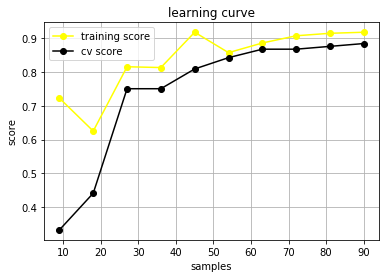

In [8]:
plot_learning_curve(clf, X_train, y_train, cv = StratifiedKFold(n_splits=4))

З рисунка видно, що перенавчання моделі недоцільне


Апостерiорнi iмовiрностi

In [9]:
clf.predict_proba(X_test)

array([[0.12036377, 0.46815342, 0.41148281],
       [0.72394322, 0.21922788, 0.0568289 ],
       [0.00788133, 0.23424141, 0.75787726],
       [0.13285057, 0.45987675, 0.40727268],
       [0.08974793, 0.43923019, 0.47102188],
       [0.73897327, 0.2137031 , 0.04732364],
       [0.2725127 , 0.46331111, 0.26417618],
       [0.05371754, 0.36171454, 0.58456792],
       [0.11113877, 0.48942278, 0.39943844],
       [0.21683028, 0.48396456, 0.29920516],
       [0.06717256, 0.38469427, 0.54813317],
       [0.76868492, 0.19798778, 0.0333273 ],
       [0.77637022, 0.18608495, 0.03754483],
       [0.75701552, 0.20589031, 0.03709416],
       [0.77434324, 0.18504358, 0.04061318],
       [0.11218002, 0.42419883, 0.46362115],
       [0.03331537, 0.33657884, 0.63010579],
       [0.22201077, 0.49713934, 0.28084989],
       [0.14697818, 0.47694629, 0.37607553],
       [0.03918197, 0.36119524, 0.59962279],
       [0.75123896, 0.20924078, 0.03952026],
       [0.08932954, 0.42489184, 0.48577862],
       [0.

In [10]:
clf.predict_proba(X_train)

array([[0.84089647, 0.13718797, 0.02191556],
       [0.77594635, 0.17602488, 0.04802877],
       [0.13142567, 0.44332471, 0.42524962],
       [0.75751372, 0.20238071, 0.04010557],
       [0.798996  , 0.17302602, 0.02797797],
       [0.06923865, 0.43122949, 0.49953186],
       [0.12892489, 0.43774361, 0.4333315 ],
       [0.76113516, 0.19792143, 0.04094341],
       [0.7855211 , 0.17925306, 0.03522584],
       [0.79320356, 0.16922949, 0.03756694],
       [0.07485424, 0.43097285, 0.4941729 ],
       [0.14165142, 0.43223386, 0.42611472],
       [0.1017776 , 0.42824408, 0.46997832],
       [0.78911651, 0.17237871, 0.03850477],
       [0.76352183, 0.19375756, 0.04272061],
       [0.25604506, 0.49734528, 0.24660967],
       [0.07721158, 0.43238302, 0.4904054 ],
       [0.05201435, 0.37733689, 0.57064875],
       [0.13180089, 0.45004609, 0.41815302],
       [0.02085193, 0.25921905, 0.71992902],
       [0.18398054, 0.47465902, 0.34136044],
       [0.01244898, 0.2537175 , 0.73383352],
       [0.

Критерії якості

In [11]:
confusion_matrix(y_train, clf.predict(X_train))

array([[40,  0,  0],
       [ 0, 34,  7],
       [ 0,  2, 37]])

In [12]:
confusion_matrix(y_test, clf.predict(X_test))

array([[10,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 11]])

In [13]:
f1_score(y_train, clf.predict(X_train), average=None)

array([1.        , 0.88311688, 0.89156627])

In [14]:
f1_score(y_test, clf.predict(X_test), average=None)

array([1.        , 0.875     , 0.91666667])

In [15]:
accuracy_score(y_train, clf.predict(X_train))

0.925

In [16]:
accuracy_score(y_test, clf.predict(X_test))

0.9333333333333333

In [17]:
precision_score(y_train, clf.predict(X_train), average=None)

array([1.        , 0.94444444, 0.84090909])

In [18]:
precision_score(y_test, clf.predict(X_test), average=None)

array([1.        , 1.        , 0.84615385])

In [19]:
recall_score(y_train, clf.predict(X_train), average=None)

array([1.        , 0.82926829, 0.94871795])

In [20]:
recall_score(y_test, clf.predict(X_test), average=None)

array([1.        , 0.77777778, 1.        ])

Границi рiшень побудовано за допомогою PCA

/home/el/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


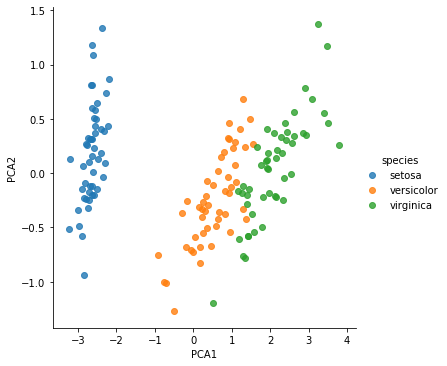

In [21]:
model = PCA(n_components=2)
model.fit(X)

X_2D = model.transform(X)
data_pd['PCA1'] = X_2D[:, 0]
data_pd['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='species', data=data_pd, fit_reg=False)

In [22]:
data_pd

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


In [23]:
pca_columns = data_pd[["PCA1", "PCA2"]]
pca_columns

,PCA1,PCA2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


/home/el/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


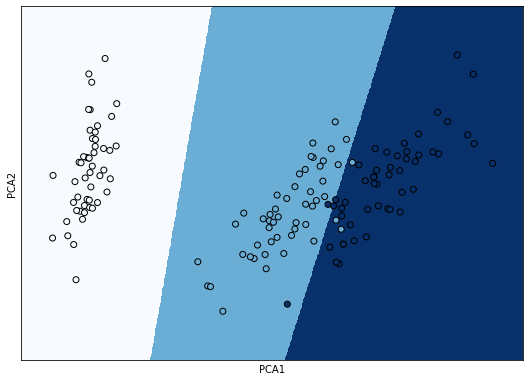

In [24]:
def decision_boundaries(X_PCA, target):
    pca_clf = LogisticRegression().fit(X_PCA, target)
    h = 0.01

    x_min, x_max = X_PCA.iloc[:, 0].min() - 0.5, X_PCA.iloc[:, 0].max() + 0.5
    y_min, y_max = X_PCA.iloc[:, 1].min() - 0.5, X_PCA.iloc[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pca_clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(9, 6.5))
    plt.pcolormesh(xx, yy, Z, cmap="Blues")

    plt.scatter(X_PCA.iloc[:, 0], X_PCA.iloc[:, 1], c=target, edgecolors="k", cmap="Blues")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")

    plt.grid()

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

decision_boundaries(pca_columns, y)

PR-curve

In [25]:
def pr_curve(estimator, X, y):
    Y = label_binarize(y, classes = np.unique(y))
    n_classes = Y.shape[1]
    y_score = estimator.decision_function(X)

    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(Y[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(Y[:, i], y_score[:, i])

    precision["micro"], recall["micro"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
    average_precision["micro"] = average_precision_score(Y, y_score, average="micro")

    color = cycle(["aqua", "darkorange", "cornflowerblue", "red"])

    _, ax = plt.subplots(figsize=(7, 8))

    display = PrecisionRecallDisplay(
        recall=recall["micro"],
        precision=precision["micro"],
        average_precision=average_precision["micro"],
    )
    display.plot(ax=ax, name="Micro-average precision-recall", color='deeppink', linestyle=':', lw = 4)

    for i, color in zip(range(n_classes), color):
        display = PrecisionRecallDisplay(
            recall=recall[i],
            precision=precision[i],
            average_precision=average_precision[i]
        )
        display.plot(ax=ax, name=f"Precision-recall for class {i+1}", color=color)


    handles, labels = display.ax_.get_legend_handles_labels()

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.legend(handles=handles, labels=labels, loc="best")
    ax.set_title("Precision-Recall curve to multi-class")

    plt.show()

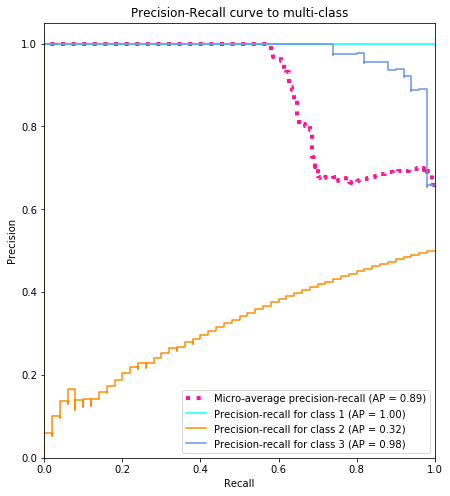

In [26]:
pr_curve(clf, X, y)

ROC-curve

In [27]:
def rc_curve(clf, X, y):    
    Y = label_binarize(y, classes = np.unique(y)) 
    n_classes = Y.shape[1] 
    y_score = clf.predict_proba(X) 
    

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])



    _, ax = plt.subplots(figsize=(7, 8))
    
    color = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])
        
    fpr["micro"], tpr["micro"], _ = roc_curve(Y.ravel(), y_score.ravel()) 
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    RocCurveDisplay(
            fpr=fpr["micro"],
            tpr=tpr["micro"],
            roc_auc=roc_auc["micro"]
        ).plot(ax=ax, name=f"micro average ROC-CURVE", color='deeppink', linestyle=':', linewidth=4) 
    
    
    for i, color in zip(range(n_classes), color):
        display = RocCurveDisplay(
            fpr=fpr[i],
            tpr=tpr[i],
            roc_auc=roc_auc[i]
        )
        display.plot(ax=ax, name=f"ROC-CURVE for class {i+1}", color=color)        
        
        

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

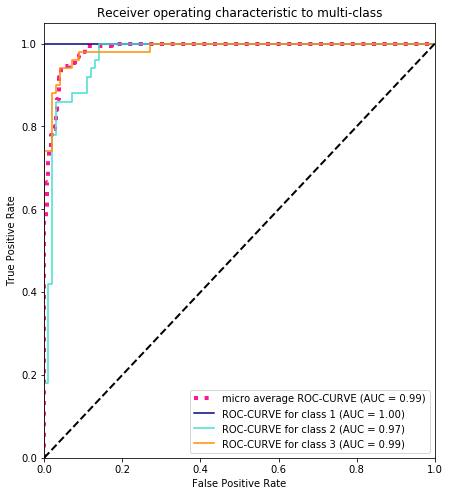

In [28]:
rc_curve(clf, X, y)

In [29]:
def grid_search_c(estimator, c_range=np.logspace(-3, 3, 10)):
    searcher = GridSearchCV(estimator=estimator,
                            param_grid={"C": c_range},
                            scoring="accuracy",
                            cv=10).fit(X_train, y_train)

    return searcher.best_params_["C"]
grid_search_c(clf)

2.154434690031882

#### Генерування датасету make_circles та побудова моделі

In [30]:
X, y = make_circles(500, factor=.1, noise=.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_circles = LogisticRegression(solver="lbfgs", penalty="l2", C=0.001, multi_class="multinomial").fit(X_train, y_train)

Матриця коефіцієнтів моделі

In [31]:
clf_circles.coef_

array([[-0.00133291,  0.00040299]])

Зсув моделі

In [32]:
clf_circles.intercept_

array([0.02502241])

Прогнози на основi побудованих моделей

In [33]:
clf_circles.predict(X_train)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [34]:
clf_circles.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Крива навчання та висновок стосовно перенавчання

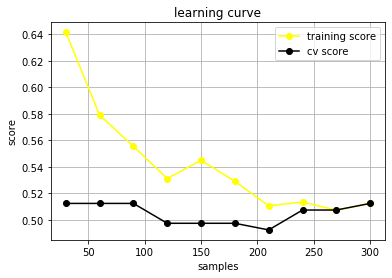

In [35]:
plot_learning_curve(clf_circles, X_train, y_train, cv = StratifiedKFold(n_splits=4))

З рисунку видно, що перенавчання моделі недоцільне

Апостерiорнi iмовiрностi

In [36]:
clf_circles.predict_proba(X_test)

array([[0.48745726, 0.51254274],
       [0.48679917, 0.51320083],
       [0.48793539, 0.51206461],
       [0.48679789, 0.51320211],
       [0.4870072 , 0.5129928 ],
       [0.48747274, 0.51252726],
       [0.48707807, 0.51292193],
       [0.48729374, 0.51270626],
       [0.48695469, 0.51304531],
       [0.48811303, 0.51188697],
       [0.48758087, 0.51241913],
       [0.48744587, 0.51255413],
       [0.48687727, 0.51312273],
       [0.48745316, 0.51254684],
       [0.48720854, 0.51279146],
       [0.48797493, 0.51202507],
       [0.48811107, 0.51188893],
       [0.48762213, 0.51237787],
       [0.48753887, 0.51246113],
       [0.48798486, 0.51201514],
       [0.48742916, 0.51257084],
       [0.48687157, 0.51312843],
       [0.48755644, 0.51244356],
       [0.48750508, 0.51249492],
       [0.48679367, 0.51320633],
       [0.48683639, 0.51316361],
       [0.48747062, 0.51252938],
       [0.48708013, 0.51291987],
       [0.48753821, 0.51246179],
       [0.48753113, 0.51246887],
       [0.

In [37]:
clf_circles.predict_proba(X_train)

array([[0.48756487, 0.51243513],
       [0.48692224, 0.51307776],
       [0.48749624, 0.51250376],
       [0.48690995, 0.51309005],
       [0.48753729, 0.51246271],
       [0.48744631, 0.51255369],
       [0.48744668, 0.51255332],
       [0.48810528, 0.51189472],
       [0.48800303, 0.51199697],
       [0.48760701, 0.51239299],
       [0.48740751, 0.51259249],
       [0.4869224 , 0.5130776 ],
       [0.48747588, 0.51252412],
       [0.48808096, 0.51191904],
       [0.48758707, 0.51241293],
       [0.48807784, 0.51192216],
       [0.48743092, 0.51256908],
       [0.48792388, 0.51207612],
       [0.48765754, 0.51234246],
       [0.4876646 , 0.5123354 ],
       [0.48796881, 0.51203119],
       [0.48698662, 0.51301338],
       [0.48743518, 0.51256482],
       [0.48764194, 0.51235806],
       [0.48748398, 0.51251602],
       [0.48795039, 0.51204961],
       [0.48734433, 0.51265567],
       [0.48760174, 0.51239826],
       [0.48750107, 0.51249893],
       [0.48739004, 0.51260996],
       [0.

Критерії якості

In [38]:
confusion_matrix(y_train, clf_circles.predict(X_train))

array([[  0, 195],
       [  0, 205]])

In [39]:
confusion_matrix(y_test, clf_circles.predict(X_test))

array([[ 0, 55],
       [ 0, 45]])

In [40]:
f1_score(y_train, clf_circles.predict(X_train))

0.6776859504132231

In [41]:
f1_score(y_test, clf_circles.predict(X_test))

0.6206896551724138

In [42]:
accuracy_score(y_train, clf_circles.predict(X_train))

0.5125

In [43]:
accuracy_score(y_test, clf_circles.predict(X_test))

0.45

In [44]:
precision_score(y_train, clf_circles.predict(X_train))

0.5125

In [45]:
precision_score(y_test, clf_circles.predict(X_test))

0.45

In [46]:
recall_score(y_train, clf_circles.predict(X_train))

1.0

In [47]:
recall_score(y_test, clf_circles.predict(X_test))

1.0

Границi рiшень. Оскільки за допомогою LogisticRegression не можна побудувати нелінійні границі рішень, то було використано GaussianNB estimator.

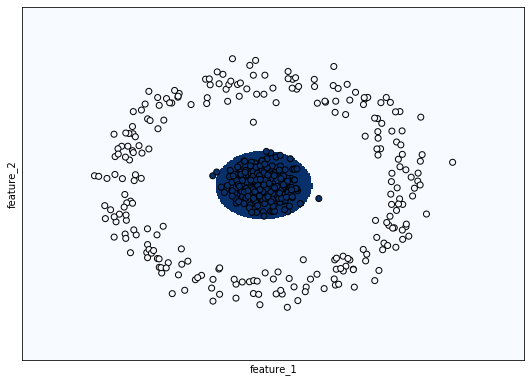

In [48]:
def decision_boundaries(X, target):
    estimator = GaussianNB().fit(X, target)
    h = 0.01

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(9, 6.5))
    plt.pcolormesh(xx, yy, Z, cmap="Blues")

    plt.scatter(X[:, 0], X[:, 1], c=target, edgecolors="k", cmap="Blues")
    plt.xlabel("feature_1")
    plt.ylabel("feature_2")

    plt.grid()

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

decision_boundaries(X, y)

PR-curve

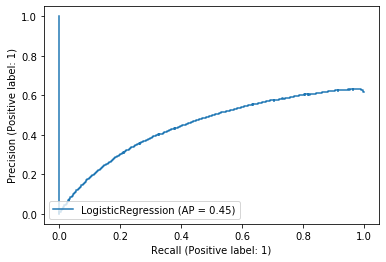

In [49]:
PrecisionRecallDisplay.from_estimator(clf_circles, X, y)

ROC-curve

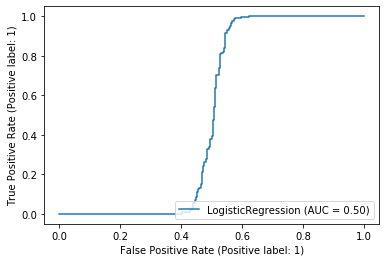

In [50]:
RocCurveDisplay.from_estimator(clf_circles, X, y)

Використовуємо уже написаний метод для пошуку параметра С моделі

In [51]:
grid_search_c(clf_circles)

10.0

### Висновки
Під час виконання роботи було досліджено два датасети та побудовано моделі LogisticRegression на основі цих даних. Було зроблено необхідні ілюстрації, наведено пояснення та проведено аналіз поведінки моделей. Оскільки регуляризація моделі визначається лише гіперпараметр penalty (в нашому випадку l2 або none), то код не було продубльовано з метою збереження лаконічності та компактності програми.